## Hoja de Trabajo No. 5
##### Stefano Aragoni, Carol Arévalo, Luis Santos

A continuación encontrarán un Notebook interactivo desarrollado por Anaconda.org. La idea de estet Notebook es repasar lo que hacen diferentes algoritmos (Modelos).  Todos estos modelos han sido estudiados y trabajados en clase, con la excepción de uno. El código utlizado es muy parecido al que se ha desarrollado en clase.  


**Problema**

Ustedes han sido contratados para ayudar a un herbario de renombre.  Han presentado este código de Anaconda.org al investigador principal y le ha parecido muy interesante.  Sin embargo, el investigador siente que hace fala algo, o que podría hacerse una mejor presentación.

Su tarea es ver si es correcto el presentimiento del investigador...¿puede hacerse más eficiente, utilizarse un código más "legible", presentarse mejor?


------------------


## Data Set Information

This is perhaps the best known database to be found in the pattern recognition literature. Fisher's paper is a classic in the field and is referenced frequently to this day. (See Duda & Hart, for example.) The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

![](https://archive.ics.uci.edu/ml/assets/MLimages/Large53.jpg)

-------------------

## Import Libraries
Como primer paso, se busca importar todas las librerías a utilizar para esta investigación. 

In [19]:
import pandas as pd
import copy
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from prettytable import PrettyTable
import pandas_profiling

## Load Dataset
Posteriormente, se carga el dataset provisto por anaconda llamado iris.csv. Se almacena el contenido del mismo en la variable dataset.

In [20]:
url = 'https://jupyterlite.anaconda.cloud/b0df9a1c-3954-4c78-96e6-07ab473bea1a/files/iris/iris.csv'
dataset = pd.read_csv(url)

## Sumarize the Dataset

En este caso, el dataset provisto cuenta con 150 datos y 5 atributos diferentes. 

In [21]:
# Print the shape of the data
dataset.shape

(150, 6)

Los 5 atributos obtenidos son:
- Id: Identificador númerico de cada record. 
- SepalLengthCm: Largo en centímetros del sepal (variable numérica)
- SepalWidthCm: Ancho en centímetros del sepal (variable numérica)
- PetalLengthCm: Tamaño en centímetros del petalo (variable numérica)
- PetalWidthCm: Ancho en centímetros del petalo (variable numérica)

En resumen, todas las variables numéricas miden diferentes aspectos de de flores Iris; tales como largo y ancho de los petalos y sepalos. Por otro lado, la variable categórica indica qué tipo de especie es. 

In [22]:
# Print the first rows of the data
dataset.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


Algunas conclusiones que se pueden obtener de las estadísticas descriptivas del conjunto de datos son:

Las variables numéricas tienen diferentes rangos y desviaciones estándar. Por ejemplo, la longitud del sépalo varía de 4,3 cm a 7,9 cm, mientras que el ancho del pétalo varía de 0,1 cm a 2,5 cm. Además, las desviaciones estándar para la longitud y el ancho del pétalo son mucho mayores que las desviaciones estándar para la longitud y el ancho del sépalo.

La mediana de la longitud del sépalo es de 5,84 cm, la mediana del ancho del sépalo es de 3,05 cm, la mediana de la longitud del pétalo es de 3,76 cm y la mediana del ancho del pétalo es de 1,19 cm.

La mediana de la longitud del sépalo es de 5,8 cm, la mediana del ancho del sépalo es de 3,0 cm, la mediana de la longitud del pétalo es de 4,35 cm y la mediana del ancho del pétalo es de 1,3 cm.

La mayoría de los valores en las variables numéricas están cerca de sus respectivos cuartiles del 25% y 75%, lo que sugiere que la distribución de las variables no está altamente sesgada hacia un lado.

In [23]:
# Describe some basic statistics about the data
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


---------
## Data cleansing

Es importante asegurarse de que no haya datos faltantes. Si hay algún dato faltante, se reemplaza por la moda o el promedio de la columna. Sin embargo, en este caso no hay datos faltantes.

<AxesSubplot: >

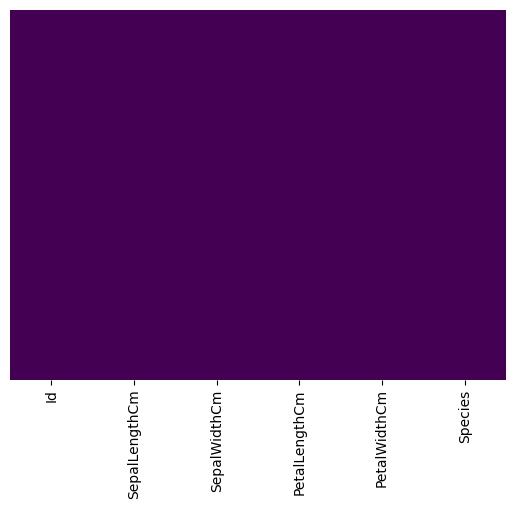

In [24]:
# graph to show missing values
sns.heatmap(dataset.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

La columna "Id" ha sido eliminada porque esta columna no proporciona información relevante para un análisis o modelado posterior y solo sirve como identificador único para cada registro en el conjunto de datos. Por lo tanto, eliminar esta columna no afectará el análisis o modelado posterior y puede simplificar el conjunto de datos.

In [25]:
# Remove first column - Id
dataset = dataset.drop('Id',axis=1)
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Es importante verificar que los datos estén balanceados, ya que esto puede afectar significativamente la precisión y el rendimiento de los modelos.

En este caso, se puede ver que están balanceados, por lo que no se hicieron cambios.

In [26]:
# Class distribution, to see the number of rows that belong to each species
dataset.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

------------
## Data Visualization

### Univariate Plots

En este caso, se graficó la información en cuatro diagramas de caja y bigotes para representar la distribución de las variables numéricas. 

- La longitud del sépalo tiene una distribución relativamente simétrica sin valores atípicos. La mediana está alrededor de 5.8 cm, con el primer y tercer cuartil alrededor de 5.1 cm y 6.4 cm, respectivamente.

- El ancho del sépalo tiene una distribución ligeramente sesgada, con algunos valores atípicos en el extremo inferior y superior. La mediana está alrededor de 3.0 cm, con el primer y tercer cuartil alrededor de 2.8 cm y 3.3 cm, respectivamente.

- La longitud del pétalo tiene una distribución altamente sesgada. La mediana está alrededor de 4.3 cm, con el primer y tercer cuartil alrededor de 1.6 cm y 5.1 cm, respectivamente.

- El ancho del pétalo tiene una distribución altamente sesgada. La mediana está alrededor de 1.3 cm, con el primer y tercer cuartil alrededor de 0.3 cm y 1.8 cm, respectivamente.


<Figure size 1000x500 with 0 Axes>

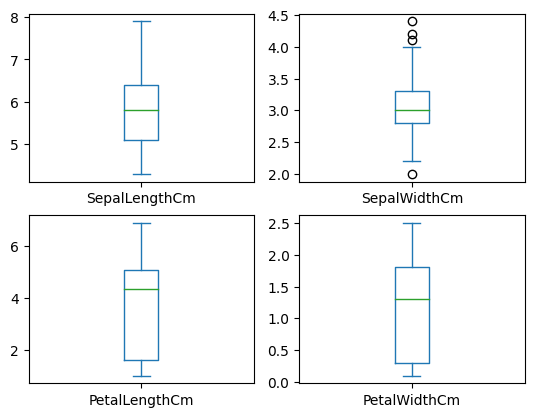

In [27]:
# Box and whisker plots. Univariate plots, one for each individual variable
fig=plt.figure(figsize=(10,5), dpi=100, facecolor='w', edgecolor='k')
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

A continuación se presenta el Profile Report de Pandas, donde se presentan gráficos de una única variable así como gráficos que presentan la relación de dos variables. A continuación también se presentan algunas conclusiones de la información recolectada del Reporte generado.

> Cabe destacar que el Profile Report de Pandas remplaza todas las funciones individuales originalmente utilizadas para graficar la respectiva información. Con un único comando se generaron estas y aún más información.

### Univariate Plots: Histograms

En este caso, el Profile Report generó diferentes histogramas para cada variable, a partir de los cuales se realizaron las siguientes observaciones:

- La longitud del sépalo tiene una distribución relativamente normal, con un pico alrededor de 5.5 cm.

- El ancho del sépalo tiene una distribución normal también, con un pico alrededor de  3.0 cm.

- La longitud del pétalo tiene una distribución bimodal, con dos picos alrededor de 1 cm y 4.8 cm.

- El ancho del pétalo tiene una distribución asimétrica positiva, con un pico alrededor de 0.2 cm.


### Multivariate Plots

Asmismo, el Reporte generado también demuestra una serie de gráficos de dispersión donde se presentan diferentes variables graficadas simultaneamente. En base a esto, se pueden hacer las siguientes observaciones:

- Existe una relación positiva entre la longitud del pétalo y el ancho del mismo. Se puede concluir que mientras crece uno, el otro también crece.

- Existe una relación débil negativa entre el ancho del sépalo y la longitud del sépalo. Esto sugiere que mientras más aumenta la medida del ancho del sépalo, la longitud del sépalo tiende a disminuir.

- Existe una relación débil positiva entre el ancho del pétalo y la longitud del sépalo. Esto indica que conforme incrementa una variable, la otra también lo hace. 

- Existe una relación moderada positiva entre la longitud del pétalo y la longitud del sépalo. Esto sugiere que mientras más crece uno, el otro también crece.

### Correlation Plot

Finalmente, el Reporte generado también crea una matriz de correlación que demuestra el grado de correlación entre las variables. En base a esta se generan las siguientes observaciones:

- Petal Length y Petal Width tienen una alta correlación, confirmando la conclusión anteriormente indicada.

- Petal Length y Petal Width tienen una alta correlación con el tipo de especie. Indicando que las especies varian principalmente en estas características.

- Sepal Length y Sepal Width tienen una mediana correlación con el tipo de especie. -

- Sepal Length tiene una alta correlación con Petal Length y Petal Width. Sin embargo, tiene una correlación negativa con Sepal Width. Esto confirma nuevamente la conclusión anteriormente realizada.

In [28]:
# Generate a report
report = pandas_profiling.ProfileReport(dataset)

# Display the report in the notebook
display(report)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

-----------
## Evaluate Some Algorithms

En esta sección, el conjunto de datos se dividió en dos, el 80% se usó para entrenar y evaluar, y el 20% restante se mantuvo como conjunto de validación.

Luego, se programaron diferentes modelos para resolver el problema y se evaluó su precisión.

### Create a validation dataset

El conjunto de datos original se divide en dos conjuntos separados: uno para entrenamiento y otro para validación. El propósito de hacer esto es permitir que el modelo se entrene en un conjunto de datos y se evalúe su rendimiento en otro conjunto de datos separado.

La variable X contiene las columnas de características (predictoras) del conjunto de datos, mientras que la variable Y contiene la columna de la variable objetivo (en este caso, la especie de la flor).

In [29]:
# Split-out validation dataset
array = dataset.values
# All rows and colums except species column
X = array[:,0:4]
# Species column
y = array[:,4]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=10)

### Build models and evaluate them

En este caso, se usa StratifiedKFold de 10 pliegues para estimar la precisión del modelo. Para esto, se divide el conjunto de datos en 10 partes, se entrena con 9 y se prueba con 1, y se repite para todas las combinaciones de divisiones de entrenamiento-prueba.

Además, se ajustaron los hiperparámetros de los modelos para mejorar su rendimiento, utilizando Grid Search.
> Esto se realizó con el propósito de ajustar los modelos lo mejor posible, en vez de simplemente utilizar los parámetros default que no necesariamente son los mejores. 

Se probaron 6 algoritmos diferentes:

1. Logistic Regression (LR)
2. Linear Discriminant Analysis (LDA)
3. K-Nearest Neighbors (KNN)
4. Classification and Regression Trees (CART)
5. Gaussian Naive Bayes (NB)
6. Support Vector Machines (SVM)

In [30]:
# define models to evaluate
models = [('LR', LogisticRegression(solver='liblinear', multi_class='ovr')),
            ('LDA', LinearDiscriminantAnalysis()),
            ('KNN', KNeighborsClassifier()),
            ('CART', DecisionTreeClassifier()),
            ('NB', GaussianNB()),
            ('SVM', SVC(gamma='auto'))]

# define hyperparameters for grid search
param_grid = {
    'LR': {'C': [0.1, 1, 10]},
    'LDA': {'solver': ['svd', 'lsqr']},
    'KNN': {'n_neighbors': [3, 5, 7, 13]},
    'CART': {'max_depth': [5,7,11,15,20], 'criterion': ['gini', 'entropy']},
    'NB': {},
    'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
}


In [31]:
# evaluate each model using grid search
results = []
names = []
info = []

for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    best_params = {}
    
    if name in param_grid:
        grid = GridSearchCV(estimator=model, param_grid=param_grid[name], cv=kfold, scoring='accuracy')
        grid_result = grid.fit(X_train, Y_train)
        best_params = grid_result.best_params_
        model = model.set_params(**best_params)
        
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    
    info.append([name, cv_results.mean(), cv_results.std(), best_params])

info.sort(key=lambda x: x[1], reverse=True)

In [32]:
# print the results for each model
table = PrettyTable()
table.field_names = ["NOMBRE", "ESTIMATED ACCURACY", "STD", "PARAMS"]
for res in info:
    table.add_row([res[0], res[1], res[2], res[3]])
print(table)

+--------+--------------------+----------------------+---------------------------------------+
| NOMBRE | ESTIMATED ACCURACY |         STD          |                 PARAMS                |
+--------+--------------------+----------------------+---------------------------------------+
|  SVM   | 0.9833333333333332 | 0.03333333333333335  |      {'C': 1, 'kernel': 'linear'}     |
|   LR   | 0.9749999999999999 | 0.03818813079129868  |               {'C': 10}               |
|  LDA   | 0.9749999999999999 | 0.03818813079129868  |           {'solver': 'svd'}           |
|  KNN   | 0.9666666666666666 | 0.055277079839256664 |           {'n_neighbors': 3}          |
|   NB   | 0.9499999999999998 | 0.055277079839256664 |                   {}                  |
|  CART  |       0.925        | 0.05833333333333333  | {'criterion': 'gini', 'max_depth': 5} |
+--------+--------------------+----------------------+---------------------------------------+


Como se puede ver en los resultados anteriores, el mejor modelo para el presente problema fue Máquinas de Soporte Vectorial (SVM) con el accuracy estimado más alto del 98.33%, seguido de Análisis Discriminante Lineal (LDA) con un accuracy estimado del 97.5%.

Los modelos con el accuracy estimado más bajo fueron Naive Bayes Gaussiano (NB) con un 95% y Árboles de Clasificación y Regresión (CART) con casi un 92%. Sin embargo, debe tenerse en cuenta que estas no son malos.

Estos resultados se pueden ver con más detalle en los siguientes gráficos de cajas y bigotes.

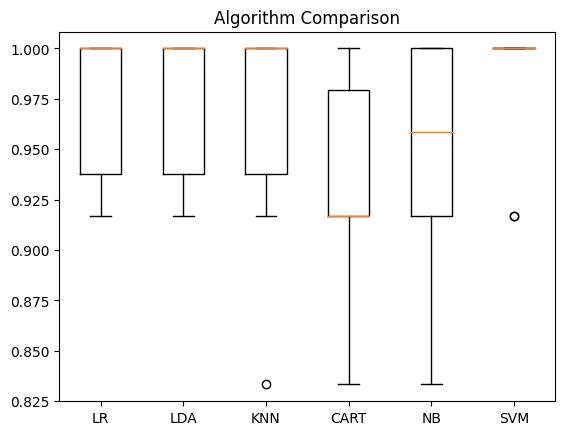

In [33]:
# Compare algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

---------
## Making predictions and evaluate them

Según lo anteriormente realizado, el modelo con la mayor accuracy estimado es SVM. Por tal razón, se utilizará este modelo para hacer diferentes predicciones.

Cabe destacar que este modelo será inicialziado con los mejores parámetros determinados anteriormente a través de Grid Search. 

In [34]:
# train the model on the training dataset
model = SVC()
model.set_params(**info[0][3]) # set the best parameters for the model
model.fit(X_train, Y_train)

# make predictions on the validation dataset
predictions = model.predict(X_validation)

# evaluate the accuracy of the predictions
accuracy = accuracy_score(Y_validation, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 96.67%


Según lo anteriormente presentado, el modelo de SVM cuenta con un accuracy de predicción de 96.67%. Esto comprueba nuevamente la aplicabilidad del modelo para este problema, ya que es capaz de dar predicciones confiables. 

A continuación se presentan otras métricas importantes del modelo SVM creado. 

Como se puede observar, la matriz de confusión muestra el número de predicciones correctas e incorrectas que el modelo hizo para cada clase. En este caso, el modelo predijo correctamente todos los ejemplos de la clase Iris-setosa. Asimismo, solo se equivocó con una predicción de Iris-versicolor.

Con relación a precision, recall y f1-score... en general, el modelo tuvo un desempeño muy bueno, con un accuracy de 97%, lo que significa que acertó en el 97% de los casos. Además, las métricas de precisión, recall y f1-score para cada clase son altas, lo que indica que el modelo es capaz de distinguir entre las tres especies de flores con bastante precisión.

In [35]:
# Evaluate predictions by comparing them to the expected results in the validation set
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

[[10  0  0]
 [ 0 12  1]
 [ 0  0  7]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.88      1.00      0.93         7

       accuracy                           0.97        30
      macro avg       0.96      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



----------
## Conclusions


